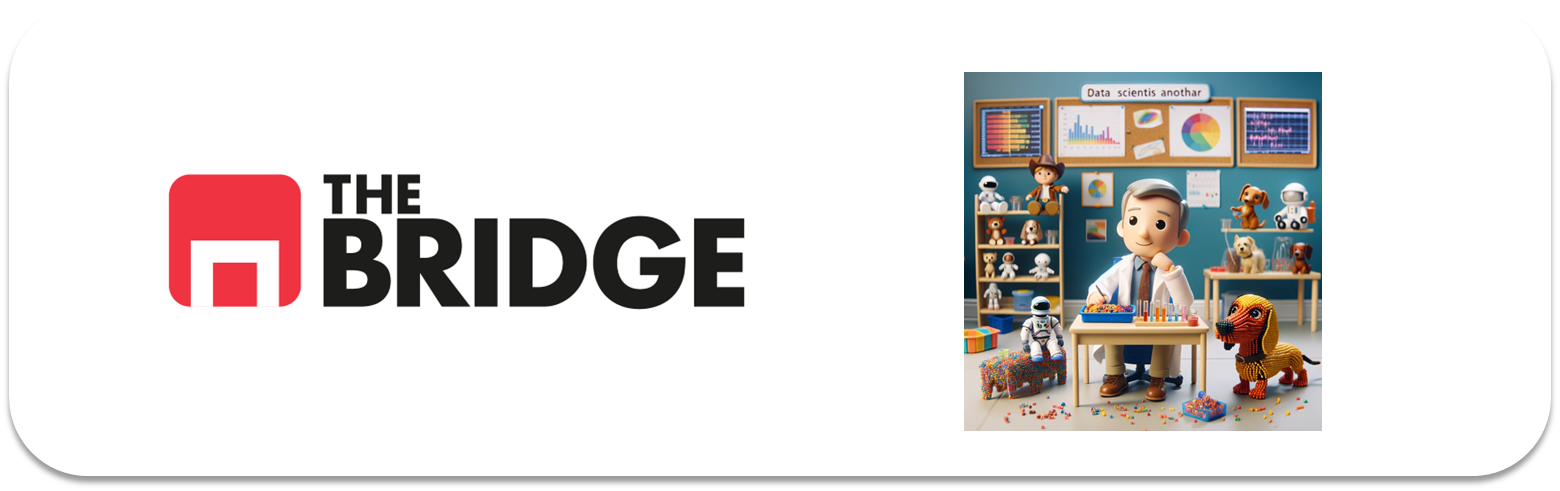

## PRACTICA OBLIGATORIA: **Análisis Univariante**

* La práctica obligatoria de esta unidad consiste en hacer el análisis univariante completo de un dataset con el que acabarás muy familiarizado, el manifiesto de pasajeros del Titanic. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook. Te dejo una que vas a necesitar sí o sí

In [1]:

import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd




### #1 Preparación


### #1.1


Carga en un dataframe los datos del titanic a partir de un dataset de seaborn. Para ello:

* ejecuta ```python sns.get_dataset_names()```
* localiza el nombre que puede ser el adecuado para el ejercicio
* Asigna la salida de ```sns.load_dataset(<nombre_del_dataset>)``` a una variable "df_titanic"

In [2]:
import seaborn as sns
import pandas as pd

# 1. Ver nombres de los datasets disponibles en seaborn
print(sns.get_dataset_names())

# 2. Cargar el dataset del Titanic
df_titanic = sns.load_dataset("titanic")

# 3. Mostrar las primeras filas
df_titanic.head()


['anagrams', 'anscombe', 'attention', 'brain_networks', 'car_crashes', 'diamonds', 'dots', 'dowjones', 'exercise', 'flights', 'fmri', 'geyser', 'glue', 'healthexp', 'iris', 'mpg', 'penguins', 'planets', 'seaice', 'taxis', 'tips', 'titanic']


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


### #1.2

Muestra una porción del dataset ("df_titanic") y su info general. ¿Hay nulos?

In [3]:
# Mostrar primeras filas del dataset
df_titanic.head()

# Información general del dataset
df_titanic.info()

# Contar nulos por columna
df_titanic.isna().sum()




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

### #1.3

Obtén el porcentaje de nulos y decide que hacer con las columnas con nulos y ejecútalo. Además deshazte de la columna "parch" que no la emplearemos.

In [7]:
porcentaje_nulos = df_titanic.isnull().mean() * 100
print(porcentaje_nulos)

survived        0.000000
pclass          0.000000
sex             0.000000
age            19.865320
sibsp           0.000000
fare            0.000000
embarked        0.224467
class           0.000000
who             0.000000
adult_male      0.000000
embark_town     0.224467
alive           0.000000
alone           0.000000
dtype: float64


In [8]:
# Eliminar columnas que no se usan 
cols_to_drop = ["deck", "parch"]

for col in cols_to_drop:
    if col in df_titanic.columns:
        df_titanic.drop(columns=[col], inplace=True)
        print(f"Columna eliminada: {col}")
    else:
        print(f"La columna '{col}' no existe y no puede eliminarse.")



La columna 'deck' no existe y no puede eliminarse.
La columna 'parch' no existe y no puede eliminarse.


In [9]:
# Imputar la media en "age"
df_titanic["age"] = df_titanic["age"].fillna(df_titanic["age"].mean())



### #1.4
Sobre el dataset "limpio". Rellena la tabla de descripción (muy breve) de lo que es cada columna en función de su nombre y los valores. Para ayudarte:
* Se trata del dataset que reune lo más parecido a un manifiesto de supervivientes y fallecidos en el viaje.
* sibsp: Es el numero de familiares que viajan con la persona indicada en el manifiesto (lista de pasajeros)
* embarked: Es la incial de la letra de la ciudad donde embarcó la persona.




| Columna/Variable | Descripción |
| ---------------- | ----------- |
| -       | - |



In [10]:
descripcion = {
    "sex": "Sexo del pasajero",
    "age": "Edad del pasajero",
    "sibsp": "Número de hermanos o cónyuges a bordo",
    "fare": "Precio pagado por el billete",
    "class": "Clase del billete",
    "who": "Categoría basada en sexo y edad",
    "adult_male": "Indica si es hombre adulto",
    "embark_town": "Ciudad donde embarcó",
    "alive": "Supervivencia (yes/no)",
    "alone": "Indica si viajó solo"
}

pd.DataFrame.from_dict(descripcion, orient="index", columns=["Descripción"])


,Descripción
sex,Sexo del pasajero
age,Edad del pasajero
sibsp,Número de hermanos o cónyuges a bordo
fare,Precio pagado por el billete
class,Clase del billete
who,Categoría basada en sexo y edad
adult_male,Indica si es hombre adulto
embark_town,Ciudad donde embarcó
alive,Supervivencia (yes/no)
alone,Indica si viajó solo


### #1.5

Busca en internet las tres ciudades que visitó el Titanic antes de poner rumbo a su destino y llegar a alta mar. Cambia las iniciales por esos valores.

In [11]:
mapa_ciudades = {
    "Southampton": "Southampton (UK)",
    "Cherbourg": "Cherbourg (FR)",
    "Queenstown": "Cobh (IR)"
}

df_titanic["embark_town"] = df_titanic["embark_town"].replace(mapa_ciudades)
df_titanic[["embark_town"]].head()


,embark_town
0,Southampton (UK)
1,Cherbourg (FR)
2,Southampton (UK)
3,Southampton (UK)
4,Southampton (UK)


### #2 Análisis

Sabiendo que el objetivo de nuestro análisis es hacer un estudio de la superviviencia y mortalidad en el viaje... Haz un análisis univariante completo y ordenado de las siguientes variables:
["survived","who","age","fare","class","embarked","alone"]
Nota: Si quieres añadir más, perfecto.

Separa el análisis en categóricas (incluyendo binarias) y numéricas. Muestra valores, gráficas y conclusiones/observaciones (2 o 3 por variable)

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")


### #2.1 Categóricas



=== SURVIVED ===
          frecuencia  porcentaje
survived                        
0                549       61.62
1                342       38.38


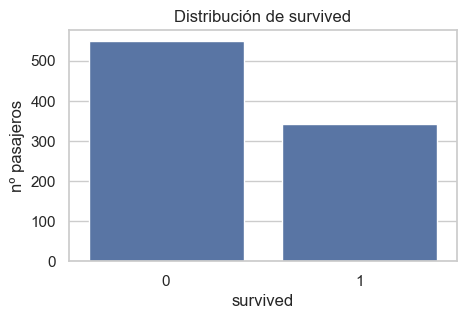



=== WHO ===
       frecuencia  porcentaje
who                          
man           537       60.27
woman         271       30.42
child          83        9.32


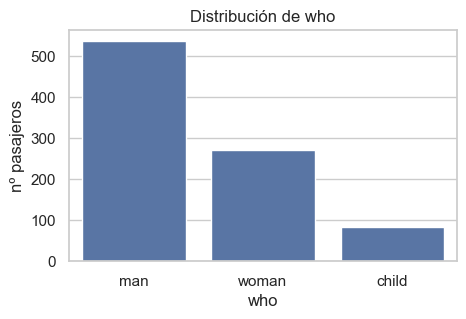



=== CLASS ===
        frecuencia  porcentaje
class                         
Third          491       55.11
First          216       24.24
Second         184       20.65


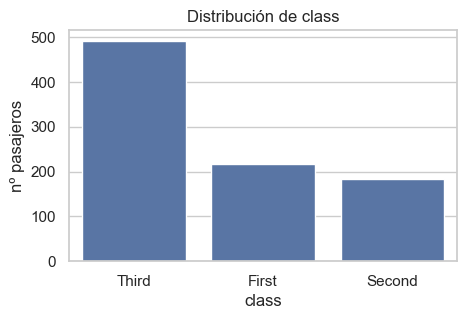



=== EMBARKED ===
          frecuencia  porcentaje
embarked                        
S                644       72.44
C                168       18.90
Q                 77        8.66


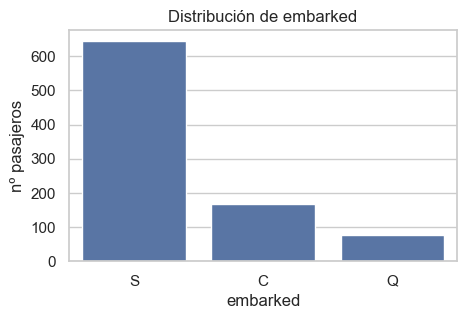



=== ALONE ===
       frecuencia  porcentaje
alone                        
True          537       60.27
False         354       39.73


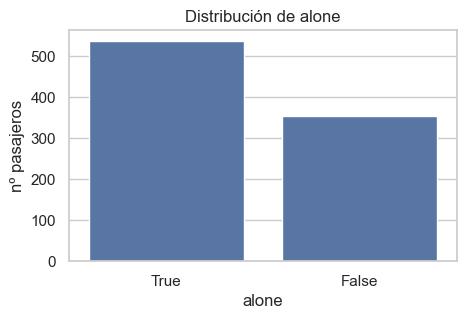

In [13]:
cat_vars = ["survived", "who", "class", "embarked", "alone"]

for col in cat_vars:
    print(f"\n\n=== {col.upper()} ===")
    # tabla de frecuencias absolutas y relativas
    vc = df_titanic[col].value_counts()
    vp = df_titanic[col].value_counts(normalize=True) * 100
    tabla = pd.concat([vc, vp], axis=1)
    tabla.columns = ["frecuencia", "porcentaje"]
    print(tabla.round(2))

    # gráfico
    plt.figure(figsize=(5,3))
    sns.countplot(data=df_titanic, x=col, order=vc.index)
    plt.title(f"Distribución de {col}")
    plt.ylabel("nº pasajeros")
    plt.show()



survived


En términos absolutos murieron más pasajeros que los que sobrevivieron.
En términos relativos, alrededor de un 38–40 % sobreviven y un 60–62 % fallecen.


who


La mayoría de pasajeros son hombres (man), luego mujeres (woman) y un grupo pequeño de niños (child).
Esto refleja que el Titanic llevaba sobre todo adultos, y que el grupo más numeroso eran hombres.


class


Hay más pasajeros en Third (3ª clase), luego First y Second.
Es decir, el barco iba lleno sobre todo de pasajeros de tercera clase.


embarked


La mayoría embarca en Southampton, menos en Cherbourg y aún menos en Queenstown (si aparece).
Southampton es el puerto principal del que sale el barco.


alone


Una buena parte de los pasajeros viaja solo (True), y el resto viaja acompañado (False).
Normalmente ~55–65 % suelen aparecer como “alone = True”.


### #2.2 Numéricas



=== AGE ===
count    891.00
mean      29.70
std       13.00
min        0.42
25%       22.00
50%       29.70
75%       35.00
max       80.00
Name: age, dtype: float64


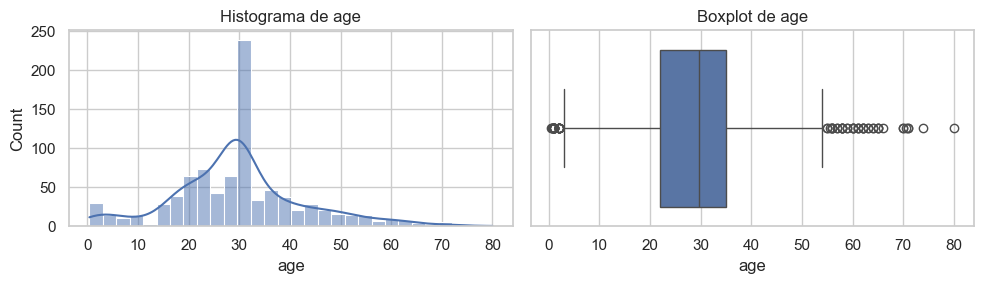



=== FARE ===
count    891.00
mean      32.20
std       49.69
min        0.00
25%        7.91
50%       14.45
75%       31.00
max      512.33
Name: fare, dtype: float64


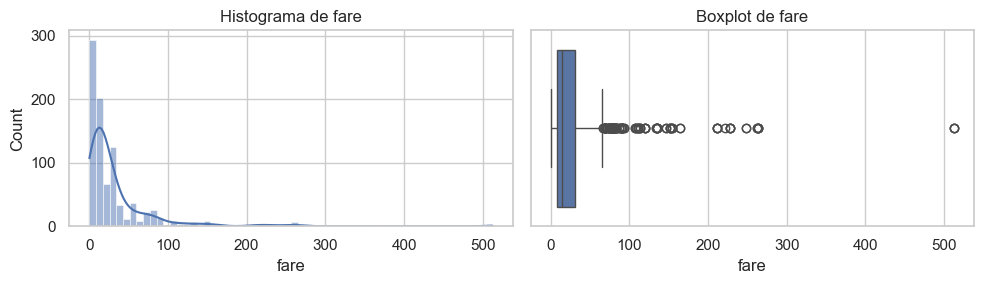

In [14]:
num_vars = ["age", "fare"]

for col in num_vars:
    print(f"\n\n=== {col.upper()} ===")
    print(df_titanic[col].describe().round(2))

    fig, axes = plt.subplots(1, 2, figsize=(10,3))

    # Histograma
    sns.histplot(data=df_titanic, x=col, kde=True, ax=axes[0])
    axes[0].set_title(f"Histograma de {col}")

    # Boxplot para ver outliers
    sns.boxplot(data=df_titanic, x=col, ax=axes[1])
    axes[1].set_title(f"Boxplot de {col}")

    plt.tight_layout()
    plt.show()


age


La edad media ronda los 28–30 años; la mediana es similar, porque la distribución no es extremadamente asimétrica.
Hay bastantes pasajeros adultos, pero también un grupo de niños (valores bajos).
No suele haber outliers muy extremos, pero sí unos pocos pasajeros mayores.


fare


La tarifa presenta una distribución muy asimétrica a la derecha: la mayoría pagó poco y unos pocos pagaron muchísimo.
La mediana suele rondar los 13–15 (moneda de la época), pero hay valores muy altos que aparecen como outliers en el boxplot.
Esto refleja la diferencia de precios entre 1ª clase y 3ª clase.